# import data

In [24]:
import pandas as pd
import numpy as np
import json

In [25]:
planner=pd.read_excel('planner.xlsx')
with open('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/63_top organization network and centrality 20220617/unique_people.txt', encoding = 'utf-8') as f:
    unique_people = f.read().splitlines()

In [26]:
planner.head(4)

,number,affliation,firstname,last name
0,43,infrastructureprogramBlueprint,NaN,@blueprintia.org
1,42,economicdevelopmentplannersfromOEV,NaN,@oevforbusiness.org
2,10,Planningstaff,cherie,bryant
3,24,Planningstaff,keith,burnsed


In [27]:
unique_people

['.williams@talgov.com',
 '0@gtlaw.com',
 '100bmtally@gmail.com',
 '10pointconstruction@gmail.com',
 '123obamayeswecan@gmail.com',
 '13scribes@gmail.com',
 '19jenkins71@gmail.com',
 '19tjenkins71@gmail.com',
 '1cogburn@cogburnbros.com',
 '1stcoastelectric@att.net',
 '22alhuff22@earthlink.net',
 '2ndchancelawnservice@gmail.com',
 '3519@cityprojects.talgov.com',
 '3nolfans@comcast.net',
 '3riverscs@windstream.net',
 '4.kerryl@gmail.com',
 '4335@cityprojects.talgov.com',
 '4handjohn@gmail.com',
 '4judah@bellsouth.net',
 '5dick@talchamber.come',
 '84@fairpoint.net',
 '850)545-2095edward.kring@talgov.comsentfrommyiphonethanks,eddieedwardmarwkringci-zenengagementambassador,departmentofcommunica-onsoﬃce:(850)891-8081cell:(850',
 '8503397879@mms.att.net',
 '8503635629@vzwpix.com',
 '8505091948@vtext.com',
 '8505096399@icmms1.sun5.lightsurf.net',
 '8505096463@vzwpix.com',
 '8505102520@vzwpix.com',
 '8505449269@vzwpix.com',
 '8505562328@vzwpix.com',
 '8505918694@mms.att.net',
 '999hankfm@gmail.c

# get OEV and Blueprint email 

In [28]:
#get OEV
oev=[]
for select in unique_people:
    if  'oevforbusiness.org' in select:
             oev.append(select)

In [29]:
oev

['alapmer@oevforbusiness.org',
 'alatimer@oevforbusiness.org',
 'djones@oevforbusiness.org',
 'lvolpe@oevforbusiness.org',
 'swilks@oevforbusiness.org']

In [30]:
#get blueprint email
blueprint=[]
for select in unique_people:
    if  'blueprint' in select:
        blueprint.append(select)



In [31]:
blueprint

['angela.ivy@blueprint2000.org',
 'autumn.calder@blueprint2000.org',
 'ben.pingree@blueprint2000.org',
 'blueprint',
 'blueprint@blueprintshop.com',
 'blueprint@theblueprintshop.com',
 'candace@theblueprintshop.com',
 'cetter@seminoleblueprintinc.com',
 'charles.hargraves@blueprint2000.o',
 'charles.hargraves@blueprint2000.org',
 'dave.snyder@blueprint2000.org',
 'david.snyder@blueprint2000.org',
 'gary.phillips@blueprint2000.org',
 'hargraves@blueprint2000.org',
 'info@blueprint2000.org',
 'infotower@seminoleblueprintinc.com',
 'infotower@seminoleblueprintsinc.com',
 'jim.davis@blueprint2000.org',
 'leon.roy@seminoleblueprintinc.com',
 'margie.quillman@blueprint2000.org',
 'megan.doherty@blueprint2000.org',
 'peter.barrilleaux@blueprint2000.org',
 'roger.cain@blueprint2000.org',
 'sara.saxner@blueprint2000.org',
 'shelonda.meeks@blueprint2000.org',
 'stephanie.delorenzo@blueprint2000.org',
 'susan.emmanuel@blueprint2000.org']

In [32]:
#delete the repeat one
blueprint_no_repeate=list(set(blueprint))
oev_no_repeate=list(set(oev))


In [33]:
oev_no_repeate

['djones@oevforbusiness.org',
 'alapmer@oevforbusiness.org',
 'alatimer@oevforbusiness.org',
 'lvolpe@oevforbusiness.org',
 'swilks@oevforbusiness.org']

In [34]:
# with open('oev_people.txt', 'w', encoding='utf-8') as f:
#     for line in oev_no_repeate:
#         f.write(f"{line}\n")

In [35]:
# with open('blueprint_people.txt', 'w', encoding='utf-8') as f:
#     for line in blueprint_no_repeate:
#         f.write(f"{line}\n")

In [36]:
#build up dictionary of OEV and blueprint
ob2email={}

ob2email['OEV']=oev_no_repeate

ob2email['Blueprint']=blueprint_no_repeate


In [37]:
ob2email

{'OEV': ['djones@oevforbusiness.org',
  'alapmer@oevforbusiness.org',
  'alatimer@oevforbusiness.org',
  'lvolpe@oevforbusiness.org',
  'swilks@oevforbusiness.org'],
 'Blueprint': ['cetter@seminoleblueprintinc.com',
  'megan.doherty@blueprint2000.org',
  'hargraves@blueprint2000.org',
  'infotower@seminoleblueprintinc.com',
  'jim.davis@blueprint2000.org',
  'peter.barrilleaux@blueprint2000.org',
  'gary.phillips@blueprint2000.org',
  'blueprint@blueprintshop.com',
  'leon.roy@seminoleblueprintinc.com',
  'shelonda.meeks@blueprint2000.org',
  'blueprint',
  'autumn.calder@blueprint2000.org',
  'roger.cain@blueprint2000.org',
  'charles.hargraves@blueprint2000.org',
  'ben.pingree@blueprint2000.org',
  'dave.snyder@blueprint2000.org',
  'charles.hargraves@blueprint2000.o',
  'info@blueprint2000.org',
  'angela.ivy@blueprint2000.org',
  'candace@theblueprintshop.com',
  'david.snyder@blueprint2000.org',
  'sara.saxner@blueprint2000.org',
  'infotower@seminoleblueprintsinc.com',
  'bluepr

In [38]:
#save to jason
# import json
# with open('OEV_blue.json', 'w') as f:
#     json.dump(ob2email, f)

# get planner email

## search for last name and first name

In [53]:
planner

,number,affliation,firstname,last name,full name
0,43,infrastructureprogramBlueprint,NaN,@blueprintia.org,NaN
1,42,economicdevelopmentplannersfromOEV,NaN,@oevforbusiness.org,NaN
2,10,Planningstaff,cherie,bryant,cherie_bryant
3,24,Planningstaff,keith,burnsed,keith_burnsed
4,11,Planningstaff,julieconn,christesen,julieconn_christesen
5,6,PlanningCommissioners&LocalPlanningAgency,jami,coleman,jami_coleman
6,39,Planningstaff,megan,doherty,megan_doherty
7,31,Planningstaff,daniel,donovan,daniel_donovan
8,16,Planningstaff,jennette,duncan,jennette_duncan
9,22,Planningstaff,jeannine,fier,jeannine_fier


In [54]:
planner['full name']=planner['firstname']+'_'+planner['last name']

In [55]:
first_name=planner['firstname'].tolist()[2:]
first_name

last_name=planner['last name'].tolist()[2:]
last_name

full_name=planner['full name'].tolist()[2:]
full_name

['cherie_bryant',
 'keith_burnsed',
 'julieconn_christesen',
 'jami_coleman',
 'megan_doherty',
 'daniel_donovan',
 'jennette_duncan',
 'jeannine_fier',
 'jeremy_floyd',
 'zach_galloway',
 'donald_gray',
 'jiwuan_haley',
 'gordon_hansen',
 'stephenm._hodges',
 'christopher_ibarra',
 'christopher_ibarra',
 'leslie_jacobs',
 'karen_jumonville',
 'devan_leavins',
 'joe_lollis',
 'roxanne_manning',
 'laroderick_mcqueen',
 'jovona_parker',
 'daniel_parker',
 'ben_pingree',
 'susan_poplin',
 'collins_proctor',
 'sean_reiss',
 'anne_rokyta',
 'lauren_rushing',
 'samuel_scheib',
 'lieslvoges_seabert',
 'jennifer_skow',
 'sue_tanski',
 'wayne_tedder',
 'vice-chair_vice-chair',
 'ian_waldick',
 'brian_waterman',
 'artie_white',
 'heather_whitmore',
 'barry_wilcox']

In [56]:
#get emails that include the last names and first names
planner_full_name=[]
for idx in range(len(last_name)):
    last = last_name[idx]
    first=first_name[idx]
    for select in unique_people:
        if first in select and last in select:
            planner_full_name.append(select)

In [57]:
len(planner_full_name)

76

In [58]:
len(set(planner_full_name))

76

In [43]:
# with open('planner_search_by_full_name.txt', 'w', encoding='utf-8') as f:
#     for line in planner_full_name:
#         f.write(f"{line}\n")

In [59]:
planner_full_name

['cherie.bryant@talgov.com',
 'cherie.bryant@talgov.com>',
 'cheriebryant',
 'cherieplanningbryant',
 'kim@inkbridge.com>,"bryant,cherie(planning',
 'keith.burnsed@talgov.com',
 'keithburnsed',
 'jamicoleman',
 'megan.doherty320@gmail.com',
 'megan.doherty@blueprin.a',
 'megan.doherty@blueprint2000.org',
 'megan.doherty@talgov.com',
 'megandoherty',
 'daniel.donovan@talgov.com',
 'danieldonovan',
 'jeremy.floyd@talgov.com',
 'jeremyfloyd',
 'jeremyfloyd@talgov.com',
 'zach.galloway@talgov.com',
 'zachary.galloway@talgov.com',
 'zacharygalloway',
 'zachgalloway',
 'donaldgray',
 'jiwuan.haley@gmail.com',
 'jiwuan.haley@talgov.com',
 'jiwuanhaley',
 'gordonhansen',
 'jumonvillekaren',
 'karen.jumonville1@qmail.com',
 'karen.jumonville@talgov.com',
 'karenjumonville',
 'karenjumonvillel@gmail.com',
 'karentedderjumonville',
 'devan.leavins@talgov.com',
 'devan.leavins@talgov.com>',
 'devanleavins',
 'joelollis',
 'manningroxanne',
 'roxanne.manning@talgov.com',
 'roxanne.manning@talgov.co

## create the dictionary of planner and emails

In [60]:
planner2email={}

for idx in range(len(last_name)):
    last = last_name[idx]
    first=first_name[idx]
    full=full_name[idx]
    for select in planner_full_name:
        if first in select and last in select:
            if full not in planner2email.keys():
                planner2email [full]=[select]
            else:
                planner2email [full].append(select)
    



In [68]:

planner2email

{'cherie_bryant': ['cherie.bryant@talgov.com',
  'cherie.bryant@talgov.com>',
  'cheriebryant',
  'cherieplanningbryant',
  'kim@inkbridge.com>,"bryant,cherie(planning'],
 'keith_burnsed': ['keith.burnsed@talgov.com', 'keithburnsed'],
 'jami_coleman': ['jamicoleman'],
 'megan_doherty': ['megan.doherty320@gmail.com',
  'megan.doherty@blueprin.a',
  'megan.doherty@blueprint2000.org',
  'megan.doherty@talgov.com',
  'megandoherty'],
 'daniel_donovan': ['daniel.donovan@talgov.com', 'danieldonovan'],
 'jeremy_floyd': ['jeremy.floyd@talgov.com',
  'jeremyfloyd',
  'jeremyfloyd@talgov.com'],
 'zach_galloway': ['zach.galloway@talgov.com',
  'zachary.galloway@talgov.com',
  'zacharygalloway',
  'zachgalloway'],
 'donald_gray': ['donaldgray'],
 'jiwuan_haley': ['jiwuan.haley@gmail.com',
  'jiwuan.haley@talgov.com',
  'jiwuanhaley'],
 'gordon_hansen': ['gordonhansen'],
 'karen_jumonville': ['jumonvillekaren',
  'karen.jumonville1@qmail.com',
  'karen.jumonville@talgov.com',
  'karenjumonville',
 

In [69]:
#save to dictionary

# with open('planner2email.json', 'w') as f:
#     json.dump(planner2email, f)

# combine the planner list, get the email

## import email data and planner data

In [90]:
with open('planner2email.json', 'r') as f:
    planner2email = json.load(f)

with open('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/64joey_github_material/CRA_network-master/joey visualization pipelines/commissioner_dict.json', 'r') as f:
    commissioner_dict = json.load(f)
with open('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/64joey_github_material/CRA_network-master/joey visualization pipelines/cra_dict.json', 'r') as f:
    cra_dict = json.load(f)
    

    
    

In [97]:
cra_list = []
for v in cra_dict.values():
    cra_list += v
commissioner_list = []
for v in commissioner_dict.values():
    commissioner_list += v
planner_list = []
for v in planner2email.values():
    planner_list += v    

target_people_list = cra_list + commissioner_list+planner_list



In [98]:
len(target_people_list) 

205

In [89]:
df = pd.read_csv('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/65_update_the graph_of_joey_and_yijia_in_paper_202206/output_attr_stats.csv')

In [87]:
from_list = df['From'].values.tolist()
to_list = df['To'].values.tolist()
cc_list = df['CC'].values.tolist()
length = len(df)

## select all emails between these people

In [99]:
idx_list = []
for i in range(length):
    if not pd.isnull(from_list[i]) and from_list[i] in target_people_list:
        if not pd.isnull(to_list[i]):
            recipients = to_list[i].split(';')
            for j in range(len(recipients)):
                if recipients[j] in target_people_list:
                    idx_list.append(i)
                    break
        if not pd.isnull(cc_list[i]):
            recipients = cc_list[i].split(';')
            for j in range(len(recipients)):
                if recipients[j] in target_people_list:
                    idx_list.append(i)
                    break

In [100]:
idx_list = list(set(idx_list))

In [102]:
len(idx_list)

577

In [103]:
df_target = df.iloc[idx_list]
df_target = df_target.reset_index(drop=True)
df_target

,filenm,From,Sent,To,CC,Bcc,Subject,Attachments,Importance,isThread,...,cc,nb_words,nb_chars,body_len,body,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,email_count
0,35430_fn_23-3-PaigeCarter-Smith2016-2-0_ln_111...,scott.maddox@talgov.com,"Tuesday, October 11, 2016 3:11 PM",scottmaddox,sdick@talchamber.com;agonzalez@visitflorida.or...,NaN,FW: South Florida Wants a JetBlue Connection t...,NaN,NaN,False,...,"sdick@talchamber.com; Pingree, Ben; Kerri.Post...",389,1986,2374,"Approaching: October 21, 2016 SENT ON BEHALF O...",64.467290,104.473729,348.189252,569.717728,428
1,67065_fn_23-10-PCSgmail2013-1-0_ln_21498.txt,scott.maddox@talgov.com,"Friday, May 10, 2013 7:45 AM",scottmaddox,paigecartersmith@gmail.com;christycartercamero...,NaN,RE: FLORIDA LEAGUE OF CITIES: Nominating Commi...,NaN,NaN,False,...,Christy Cameron christycartercameron@gmail.co...,103,458,560,Ok great I will double check with him b/c I b...,64.467290,104.473729,348.189252,569.717728,428
2,66951_fn_23-10-PCSgmail2013-1-0_ln_14769.txt,scott.maddox@talgov.com,"Thursday, April 04, 2013 12:29 PM",scottmaddox2012@gmail.com;paigecartersmith@gma...,invalid_nan,NaN,FW: news clips,NaN,NaN,False,...,INVALID_TYPE,18,118,135,"All the best, Allie Merzer Fleming Aide to Com...",64.467290,104.473729,348.189252,569.717728,428
3,49669_fn_9-7-ACoreyAdam-Corey-2016-1-0_ln_7457...,waynetedder,"Friday, December 16, 2016 5:16 PM",rickmccraw;roxannemanning,invalid_nan,NaN,FW: CRA boundary. South side.,NaN,NaN,False,...,INVALID_TYPE,37,192,228,Wasnt there a legal opinion regarding whether ...,135.126374,207.168103,704.991758,1060.070772,364
4,11215_fn_23-7-PaigeCarter-Smith2017-3-0_ln_486...,waynetedder,"Wednesday, March 22, 2017 10:12 PM",staceypeter,sherricurtis;alanrosenzweig;jimcooke;cathybran...,NaN,Re: 3/23/17 CRA Board Meeting - Modification #1,NaN,NaN,False,...,"Branch, Cathy; Craig, Deborah; Fleming, Allie;...",263,1610,1872,Based on the discussion at tonights City Commi...,135.126374,207.168103,704.991758,1060.070772,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,70113_fn_21-11-KimRivers2017_ln_12.txt,waynetedder,"Sunday, January 15, 2017 7:00 PM",kimrivers;jtburnette,karenjumonville,NaN,Fwd: A Citizen Inquiry from Talgov.com - Medic...,NaN,NaN,False,...,Karen Jumonville,43,199,241,I just want to make sure you are seeing these ...,135.126374,207.168103,704.991758,1060.070772,364
573,31179_fn_23-2-PaigeCarter-Smith2016-1-0_ln_103...,karen.jumonville@talgov.com,"August 4, 2016 at 8:32:11 AM EDT",wayne.tedder@talgov.com;invalid,invalid_nan,NaN,Fwd: C-3 treebank,NaN,NaN,False,...,INVALID_TYPE,6,47,52,Sorry--please see attached. Begin forwarded me...,747.125000,2273.134543,3625.750000,10663.709020,16
574,57559_fn_31-2-GaryYordon2-3_ln_73322.txt,barrywilcox,"Thursday, December 4, 2014 at 5:32:41 PM East...",garyyordon,megandoherty,NaN,Miers & Rockaway Parcels,NaN,NaN,False,...,Megan Doherty; Jeremy Floyd; Wayne Tedder,108,648,755,"ASachments: image001.jpg, Overall-Final.pdf, O...",105.905263,125.461283,588.031579,690.344109,95
575,67174_fn_23-10-PCSgmail2013-1-0_ln_28045.txt,scott.maddox@talgov.com,"Thursday, August 08, 2013 1:27 PM",paigecartersmith@gmail.com;scott@scottmaddox.com,invalid_nan,NaN,"FW: Pensacola Council President, P.C. Wu appoi...",NaN,NaN,False,...,INVALID_TYPE,21,131,151,"of Cities (FLC) All the best, Allie Merzer Fle...",64.467290,104.473729,348.189252,569.717728,428


In [104]:
#df_target.to_csv('email network for planner cra and city commissioner.csv',index=0)

## create a adj matrix based on the email

In [83]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name

In [106]:
#email to adj matrix.

def process_data_both_new(infile):
    df_email = pd.read_csv(infile,index_col = 0)

    from_list = df_email['From'].values.tolist()
    #for i in range(len(from_list)):
    #    from_list[i] = eval(from_list[i])
    #df_email['From'] = from_list

    to_list = df_email['To'].values.tolist()
    #for i in range(len(to_list)):
    #    to_list[i] = eval(to_list[i])
    #df_email['To'] = to_list

    cc_list = df_email['CC'].values.tolist()

    unique_people = set()
    for i in range(len(from_list)):
        unique_people.add(from_list[i])

    for i in range(len(cc_list)):
        for lst in cc_list[i].split(';'):
            unique_people.add(lst)

    for i in range(len(to_list)):
        for lst in to_list[i].split(';'):
            unique_people.add(lst) #add 

    unique_people = list(unique_people)
    unique_people.sort()
    name2id, id2name = nameToIndexDict(unique_people)

    commissioner_dict = {}
    commissioner_dict['scottmaddox'] = ['allieflemingforscottmaddox',
                                    'maddoxscos',
                                    'maddoxscoy',
                                    'maddoxscott',
                                    'scofcharlesmaddox',
                                    'scofcharlesmaddox@gmail.com',
                                    'scott.maddox=talgov.com@mail13.us2.mcsv.net',
                                    'scott.maddox=talgov.com@mail24.wdc03.rsgsv.net',
                                    'scott.maddox=talgov.com@mail65.atl11.rsgsv.net',
                                    'scott.maddox@talgov.com',
                                    'scott.maddox@tallgov.com',
                                    'scott@scottmaddox.com',
                                    'scott@scottmaddox.com>',
                                    'scott@scottmaddox2012.com',
                                    'scottcharlesmaddox',
                                    'scottcharlesmaddox@gmail.com',
                                    'scottmaddox',
                                    'scottmaddox2012@g1nail.com',
                                    'scottmaddox2012@gmail.com',
                                    'scottmaddox@scottmaddox.com',
                                    'scottmaddoxemail',
                                    'scottmaddoxscott',
                                    'scoi.maddox@talgov.com',
                                    'maddox@maddoxhorne.com',
                                    'scott@govinc.net',
                                    'shamaddox@embarqmail.com',
                                    'scof.maddox@talgov.com',
                                    'scos.maddox@talgov.com',
                                    'sha_maddox',
                                    ]

    commissioner_dict['andrewgillum'] = ['agillum@pfaw.org',
                                    'andrew.gillum@tagov.com',
                                    'andrew.gillum@talgov.com',
                                    'andrew.gillum@tallgov.com',
                                    'andrew@andrewgillum.com',
                                    'andrewgillum',
                                    'andrewgillum@talgov.com',
                                    'andrewgillumandrew',
                                    'andrewgillumcampaign',
                                    'gillumandrew',
                                    'info@andrewgillum.com',
                                    'gilluma@gmail.com',
                                    'gilluma@talgov.com',
                                    'andrewgilliam',
                                    'andrewgillium',
                                    'andrewgillams', 
                                    ]

    commissioner_dict['markmustian'] = ['mark.mustian@talgov.com',
                                    'mark@markmustian.com',
                                    'markmustian',
                                    'mmustian@ngn-tally.com',
                                    'mmustian@ngnlaw.com',
                                    'mustianmark',
                                    ]
    commissioner_dict['gilziffer'] = ['gil.ziffer@talgov.co',
                                    'gil.ziffer@talgov.com',
                                    'gil.ziffer@tallgov.com',
                                    'gilziffer',
                                    'gilziffer@talgov.com',
                                    'gilziffergil',
                                    'ziffergil',
                                    'gil@ziffberry.com'
                                    ]
    commissioner_dict['curtisrichardson'] = ['curtis.richardson@talgov.com',
                                          'curtisrichardson',
                                          'richardsoncurtis',
                                          'ultis_richardson',
                                          'cabaide@aol.com',
                                          ]

    commissioner_dict['nancymiller'] = ['millernancy',
                                    'millernancyrick',
                                    'nancy.miller@talgov.co',
                                    'nancy.miller@talgov.com',
                                    'nancy.miller@talgov.com>',
                                    'nancy.miller@tallgov.com',
                                    'nancymiller',
                                    'nancymillernancy',
                                    'temnancymiller',
                                    ]

    commissioner_dict['johnmarks'] = ['john.marks@talgov.com',
                                'john.marks@tallgov.com',
                                'john.marksiii@talgov.com',
                                'john.markslll@talgov.com',
                                'johnmarks',
                                'johnmarksiii',
                                'johnmarksiii@talgov.com',
                                'marksj@talgov.com',
                                'marksjohn',
                                'mayorjohnmarks',
                                  ]

    commissioner_list = []
    for v in commissioner_dict.values():
          commissioner_list += v

    
    with open('planner2email.json', 'r') as f:
        planner_dict = json.load(f) 
    planner_list=[]
    for v in planner_dict.values():
          planner_list += v
                    
    cra_dict = {}
    cra_dict['johndailey'] = ['daileyj@leoncountyfl.gov',
                            'daileyj@leoncountygl.gov',
                            'daileyjgov',
                            'daileyjohn',
                            'john_dailey@comcast.net',
                            'johndailey',
                            'johndailey@leoncountyfl.gov',
                          ]
    cra_dict['bryandesloge'] = ['bdesloge@icloud.com',
                            'bryandesloge',
                            'desloge.bryan@gmail.com',
                            'deslogeb@leoncountyfl.gov',
                            'deslogeb@leoncountyﬂ.gov',
                            'deslogebryan',
                            'deslogebryan@leoncountyfl.gov',
                            'bryan@deslogemedical.com',
                            ]

    #cra_dict['jessicamiller'] = ['jessica.miller@talgov.com',
                            #'jessica.miller@talgov.com>',
                            # 'jessicamiller',
                            # 'jmiller@kidsincorporated.org',
                            # 'jmiller@talchamber.com',
                            # ]
    cra_dict['janesauls'] = ['janesauls',
                        'saulsj@leoncountyfl.gov',
                        'saulsj@mail.co.leon.fl.us',
                        ]

    cra_dict['nickmaddox'] = ['maddoxn@leoncountyfl.com',
                            'maddoxn@leoncountyfl.gov',
                            'maddoxn@leoncountyﬂ.gov',
                            'maddoxnick',
                            'nick.maddox@talgov.com',
                            'nickmaddox',
                            'maddox.nicholas@gmail.com',
                          ]

    cra_dict['lindleymary'] = ['lindleym@leoncountyﬂ.gov',
                            'lindleymaryann',
                            'lindleym@leoncountyfl.gov',
                            'mary_lindley',
                            'marylindley',
                          ]

    cra_dict['kristindozer'] = ['dozierk',
                            'dozierk@leoncountyﬂ.gov',
                            'dozierkristin',
                            'kristindozier@gmail.com',
                            'kristindozer',
                            'dozierk@leoncountyfl.gov',
                            'kristindozier',
                            'kdozier@maddogweb.com',
                            'kristindozier@gmail.com',
                            ]

    cra_dict['billproctor'] = ['bill.proctor@talgov.com',
                            'proctorb@leoncounty.fl.gov',
                            'proctorb@leoncountyfl.com',
                            'proctorb@leoncountyﬂ.gov',
                            'proctorbgov',
                            'proctorbill',
                            'proctorb@leoncountyfl.gov',
                            'billproctor',
                            ]

    cra_list = []
    for v in cra_dict.values():
        cra_list += v

    total_list = cra_list + commissioner_list+planner_list

    nodes_to_add = list(cra_dict.keys()) + list(commissioner_dict.keys())+list(planner_dict.keys())

    cra_idx_list = []
    for i,people in enumerate(unique_people):
        if people in cra_list:
            cra_idx_list.append(i)

    commissioner_idx_list = []
    for i,people in enumerate(unique_people):
        if people in commissioner_list:
            commissioner_idx_list.append(i)
    
    planner_idx_list=[]
    for i,people in enumerate(unique_people):
        if people in planner_list:
            planner_idx_list.append(i)
    
            
            
    total_idx_list = cra_idx_list + commissioner_idx_list+planner_idx_list

    num_people = len(unique_people)
    idx_mapping = {}
    cra_idx_list_new = []
    for person,idx_list in cra_dict.items():
        global_indices = []
        for idx in idx_list:
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx)
            global_indices.append(global_idx)
        idx_mapping[person] = global_indices
        num_people +=1
        #cra_idx_list_new.append(num_people) 

    planner_idx_list_new = []
    for person,idx_list in planner_dict.items():
        global_indices = []
        for idx in idx_list:
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx)
            global_indices.append(global_idx)
        idx_mapping[person] = global_indices
        num_people +=1
        #planner_idx_list_new.append(num_people) 
        
        
    commissioner_idx_list_new = []
    for person,idx_list in commissioner_dict.items():
        global_indices = []
        for idx in idx_list:
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx)
            global_indices.append(global_idx)
        
        idx_mapping[person] = global_indices
        num_people +=1 
        #commissioner_idx_list_new.append(num_people) 


    col_names = []
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        col_names.append(name)
    col_names

    ### plot from to 

    # build adj_mat
    adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = to_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '':
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_to[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_to_directed = np.copy(adj_mat_from_to)

    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
    adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
    adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

    ### plot from cc 

    # build adj_mat
    adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = cc_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '' :
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_cc[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
    #adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

    adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
    adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


    adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
    adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

    adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
    adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    return adj_mat_from_to_and_cc_directed_pd

In [113]:
adj_planner=process_data_both_new('email network for planner cra and city commissioner.csv')

In [117]:
adj_planner

,johndailey,bryandesloge,janesauls,nickmaddox,lindleymary,kristindozer,billproctor,cherie_bryant,keith_burnsed,jami_coleman,...,artie_white,heather_whitmore,barry_wilcox,scottmaddox,andrewgillum,markmustian,gilziffer,curtisrichardson,nancymiller,johnmarks
johndailey,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
bryandesloge,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0
janesauls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nickmaddox,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
lindleymary,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,2.0,2.0
kristindozer,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
billproctor,3.0,3.0,3.0,3.0,0.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,3.0,0.0
cherie_bryant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
keith_burnsed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jami_coleman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#adj_planner.to_csv('planner email adj matrix.csv')

# use adj matrix，draw email network figure

In [145]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from datetime import datetime

import copy
plt.rcParams["font.weight"] = "normal"


In [146]:
adj_planner=pd.read_csv('planner email adj matrix.csv',index_col=0)

In [147]:
adj_planner

,johndailey,bryandesloge,janesauls,nickmaddox,lindleymary,kristindozer,billproctor,cherie_bryant,keith_burnsed,jami_coleman,...,artie_white,heather_whitmore,barry_wilcox,scottmaddox,andrewgillum,markmustian,gilziffer,curtisrichardson,nancymiller,johnmarks
johndailey,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
bryandesloge,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,4.0,0.0
janesauls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nickmaddox,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
lindleymary,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,2.0,2.0
kristindozer,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
billproctor,3.0,3.0,3.0,3.0,0.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,3.0,0.0,3.0,0.0,3.0,0.0
cherie_bryant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
keith_burnsed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jami_coleman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
org_name=adj_planner.columns.tolist()

In [149]:
city_commissioner=['scottmaddox',
 'andrewgillum',
 'markmustian',
 'gilziffer',
 'curtisrichardson',
 'nancymiller',
 'johnmarks']

cra= ['johndailey',
 'bryandesloge',
 'janesauls',
 'nickmaddox',
 'lindleymary',
 'kristindozer',
 'billproctor']


In [150]:
planner=[]

for i in org_name:
    if i not in city_commissioner and i not in cra:
        planner.append(i)

In [151]:
planner

['cherie_bryant',
 'keith_burnsed',
 'jami_coleman',
 'megan_doherty',
 'daniel_donovan',
 'jeremy_floyd',
 'zach_galloway',
 'donald_gray',
 'jiwuan_haley',
 'gordon_hansen',
 'karen_jumonville',
 'devan_leavins',
 'joe_lollis',
 'roxanne_manning',
 'laroderick_mcqueen',
 'daniel_parker',
 'ben_pingree',
 'susan_poplin',
 'collins_proctor',
 'samuel_scheib',
 'wayne_tedder',
 'brian_waterman',
 'artie_white',
 'heather_whitmore',
 'barry_wilcox']

In [152]:
nodes_names = list(adj_planner.columns)


In [153]:
nodes_names

['johndailey',
 'bryandesloge',
 'janesauls',
 'nickmaddox',
 'lindleymary',
 'kristindozer',
 'billproctor',
 'cherie_bryant',
 'keith_burnsed',
 'jami_coleman',
 'megan_doherty',
 'daniel_donovan',
 'jeremy_floyd',
 'zach_galloway',
 'donald_gray',
 'jiwuan_haley',
 'gordon_hansen',
 'karen_jumonville',
 'devan_leavins',
 'joe_lollis',
 'roxanne_manning',
 'laroderick_mcqueen',
 'daniel_parker',
 'ben_pingree',
 'susan_poplin',
 'collins_proctor',
 'samuel_scheib',
 'wayne_tedder',
 'brian_waterman',
 'artie_white',
 'heather_whitmore',
 'barry_wilcox',
 'scottmaddox',
 'andrewgillum',
 'markmustian',
 'gilziffer',
 'curtisrichardson',
 'nancymiller',
 'johnmarks']

In [158]:
directed_adj_np=adj_planner.iloc[:,:].to_numpy().astype('float')
directed_adj_np

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  3.,  0., ...,  0.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 3.,  6.,  0., ...,  1.,  8.,  6.],
       [ 1.,  1.,  1., ...,  0.,  7., 10.]])

In [156]:
np.shape(directed_adj_np)

(39, 39)

In [221]:
def plot_network_directed(adj_mat,nodes_names, pic_name = 'test', savefig=False):
    #fig = plt.figure(figsize=(12,12))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)

    #group1 = ['bill_proctor','curtis_richardson']
    
    if adj_mat[adj_mat !=0].mean() >25 : # in case number is too high, make points smaller
        adj_mat = adj_mat / 10
        
    #if adj_mat[adj_mat !=0].mean() < 3 and adj_mat[adj_mat !=0].mean() >=1.8 : # in case number is too low, make points larger
     #   adj_mat = adj_mat * 2
    
    
    group1= city_commissioner
    group1_list=[]
    for i,people in enumerate(nodes_names):
        if people in group1:
            group1_list.append(i)
    group1_list

    group2 = cra
    group2_list=[]
    for i,people in enumerate(nodes_names):
        if people in group2:
            group2_list.append(i)
    group2_list

    group3 = planner
    group3_list=[]
    for i,people in enumerate(nodes_names):
        if people in group3:
            group3_list.append(i)
    group3_list

    name2id = {}
    id2name = {}
    for i in range(len(nodes_names)):
        name2id[nodes_names[i]] = i
        id2name[i] = nodes_names[i]


    # new
    fig = plt.figure(figsize=(20,14))
    #fig.suptitle(pic_name,fontsize = 24, y=1.04)
    #fig.text(.5, 1.005, 'edge thickness: #emails weighted by #receivers, then normalized $\in$(0,1)\n node size: #emails related', fontsize = 20, ha='center')

    G = nx.DiGraph(directed=True) #change to directed network
    G.add_nodes_from(nodes_names)
    #prepare for plot
    networks = [1,2,3]

    networks_list = []
    for i in range(len(nodes_names)):
        if i in group1_list:
            networks_list.append(1)
        elif i in group2_list:
            networks_list.append(2) 
        else:
            networks_list.append(3)
    # map color
    node_network_map = dict(zip(nodes_names, networks_list))
    colors = ['red','orange' , 'green']
    color_map = dict(zip(networks, colors))

    #print("nodes_names: ",len(nodes_names))
    print("adj_mat: ",adj_mat.shape)
    for row, row_val in enumerate(nodes_names):
        for col, col_val in enumerate(nodes_names):
            #if col < row and adj_mat[row, col] != 0.0:
            if adj_mat[row, col] != 0.0 and col != row:
                G.add_edge(row_val, col_val)

    nodes_by_color = {val: [node for node in G if color_map[node_network_map[node]] == val]
                      for val in colors}

    
    pos = nx.circular_layout(G)
    #pos = nx.spring_layout(G)

    radii = [3,6,10]  # for concentric circles

    for ea in pos.keys():
        new_r = 1
        if ea in nodes_by_color['red']:
            new_r = radii[0]
        elif ea in nodes_by_color['orange']:
            new_r = radii[1]
        elif ea in nodes_by_color['green']:
            new_r = radii[2]
        else:
            pass
        pos[ea] *= new_r   # reposition nodes as concentric circles
    #scale edge width
    edge_width = []
    edges_list = G.edges()
    for s,t in edges_list:
        edge_width.append(adj_mat[name2id[s],name2id[t]])
    edge_width = np.array(edge_width)
    edge_width = edge_width*0.3
#scale node size
    node_size = adj_mat.sum(axis=0)+1
    node_size = 10*node_size
    labeling_idx = node_size.argsort()[::-1]
    labels = {}
    for i in labeling_idx:
        node = id2name[i]
        tmp = node#john_mark
        labels[node] = tmp

    node_sizes = {}
    node_sizes['red'] = node_size[group1_list]
    node_sizes['orange'] = node_size[group2_list]
    node_sizes['green'] = node_size[group3_list]
    #node_sizes['green'] = node_size[[item for item in np.arange(len(nodes_names)) if item not in (group1_list+group2_list)]]

    legend_labels = {'red': 'City commissioner','orange': 'CRA','green': 'Planner' }
    pos_new = copy.deepcopy(pos)
    for k, v in pos.items():
        print("k: ", k, " v: ",v)
        if k == 'scottmaddox':
            pos_new[k][0] = pos_new[k][0]-4 
            pos_new[k][1] = pos_new[k][1]-3
        elif k == 'andrewgillum':
            pos_new[k][0] = pos_new[k][0] 
            pos_new[k][1] = pos_new[k][1]-3
        elif k == 'gilziffer':
            pos_new[k][0] = pos_new[k][0]-8
            pos_new[k][1] = pos_new[k][1]+3
        elif k == 'nancymiller':
            pos_new[k][0] = pos_new[k][0]-8.5
            pos_new[k][1] = pos_new[k][1]
        elif k == 'johnmarks':
            pos_new[k][0] = pos_new[k][0]-5
            pos_new[k][1] = pos_new[k][1]+6
        elif k == 'curtisrichardson':
            pos_new[k][0] = pos_new[k][0]
            pos_new[k][1] = pos_new[k][1]+1   
            
            
            
            
    for color, node_names in nodes_by_color.items():
        local_node_size = node_sizes[color]
        nx.draw_networkx_nodes(G, pos=pos_new, node_size=local_node_size, edgecolors='darkblue', nodelist=node_names, node_color=color, label=legend_labels[color])

        
    
#       if k == 'curtisrichardson':
#         pos_new[k][0] = pos_new[k][0] 
#         pos_new[k][1] = pos_new[k][1]
        
        
   
    nx.draw_networkx_edges(G, pos=pos_new, width=edge_width, edge_color = 'black')

    print("pos: ", len(pos), ' labels: ', len(labels))

   #pos_new = copy.deepcopy(pos)
    

#       if k=='billproctor':
#         pos_new[k][0] = pos_new[k][0] + 1.4



    nx.draw_networkx_labels(G, pos=pos_new, labels=labels, font_size=16, font_color='black')
    
    plt.legend(fontsize = 24, loc=2)
    plt.axis('off')

    #plt.subplots_adjust(left=0.4, bottom=0.1, right=0.9, top=0.2)
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=4, wspace=0, hspace=0)
    plt.title(pic_name,fontsize = 24, fontweight='bold')

    plt.tight_layout()
    if savefig == True:
        savefig_out = pic_name.replace(' ','_')
        plt.savefig(savefig_out+'.png')
    plt.show()

In [222]:
cra

['johndailey',
 'bryandesloge',
 'janesauls',
 'nickmaddox',
 'lindleymary',
 'kristindozer',
 'billproctor']

In [223]:
city_commissioner

['scottmaddox',
 'andrewgillum',
 'markmustian',
 'gilziffer',
 'curtisrichardson',
 'nancymiller',
 'johnmarks']

adj_mat:  (39, 39)
k:  johndailey  v:  [ 6.00000000e+00 -7.56520482e-08]
k:  bryandesloge  v:  [5.92230141 0.96246761]
k:  janesauls  v:  [5.69121874 1.90000792]
k:  nickmaddox  v:  [5.31273616 2.78833891]
k:  lindleymary  v:  [4.79665662 3.60445356]
k:  kristindozer  v:  [4.15634611 4.32721447]
k:  billproctor  v:  [3.40838853 4.93790303]
k:  cherie_bryant  v:  [4.28692557 9.03450406]
k:  keith_burnsed  v:  [2.78217474 9.60518097]
k:  jami_coleman  v:  [1.20536696 9.92708837]
k:  megan_doherty  v:  [-0.40265908  9.99188994]
k:  daniel_donovan  v:  [-2.00025648  9.79790663]
k:  jeremy_floyd  v:  [-3.54604823  9.3501625 ]
k:  zach_galloway  v:  [-5.00000041  8.66025365]
k:  donald_gray  v:  [-6.32445375  7.74604894]
k:  jiwuan_haley  v:  [-7.48510696  6.63122633]
k:  gordon_hansen  v:  [-8.45190025  5.3446583 ]
k:  karen_jumonville  v:  [-9.19979429  3.91966594]
k:  devan_leavins  v:  [-9.70941817  2.39315658]
k:  joe_lollis  v:  [-9.96757304  0.80466577]
k:  roxanne_manning  v:  [-9.96

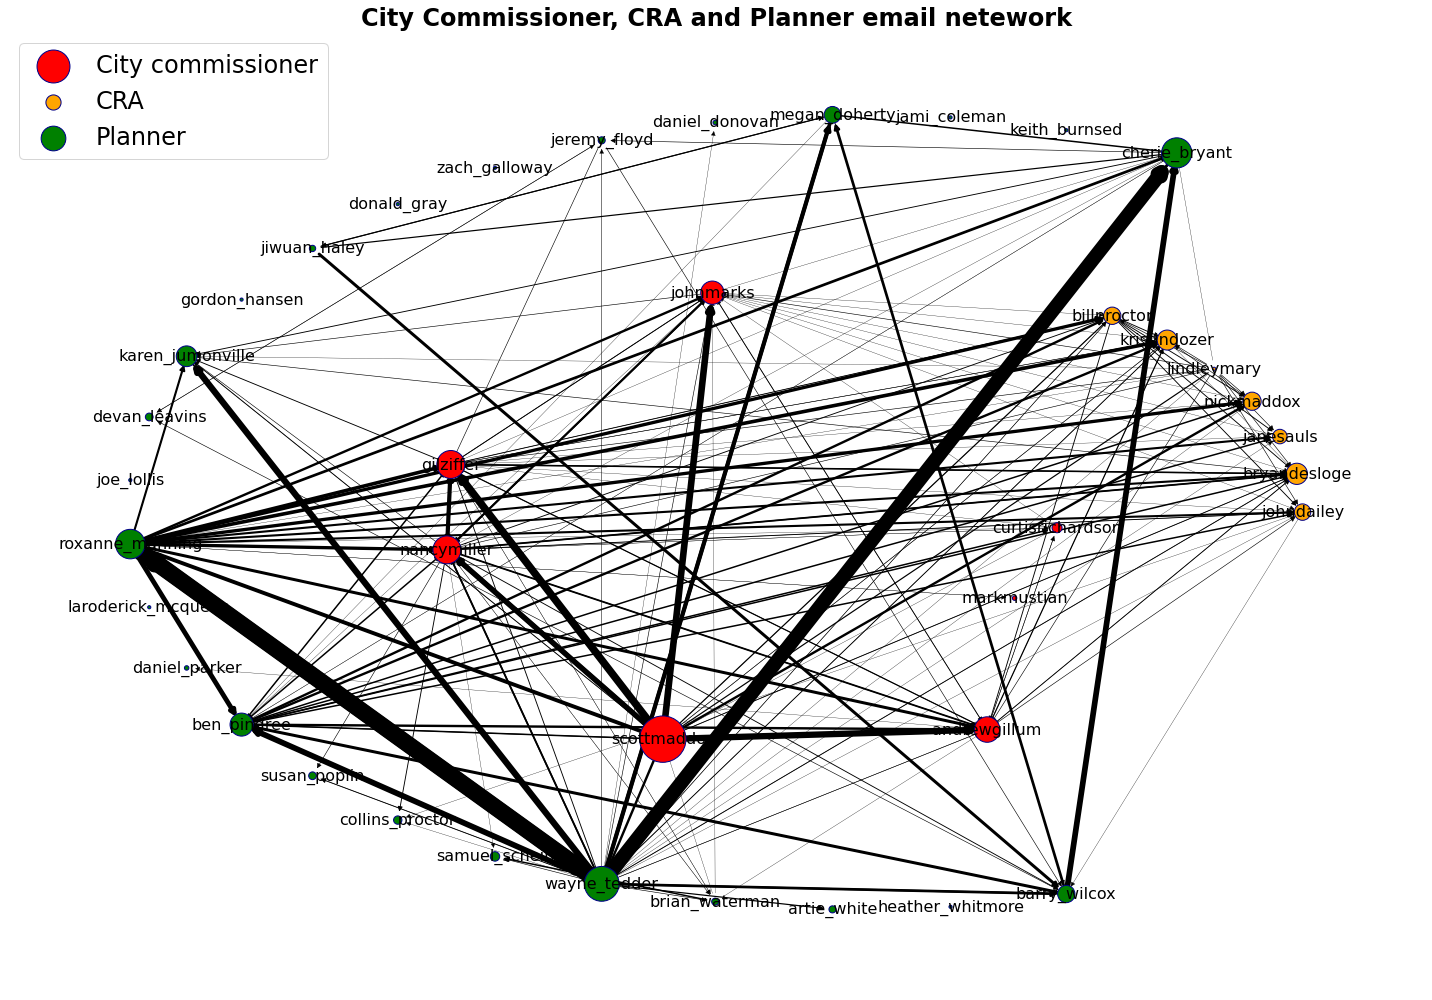

In [224]:
whole_stage=plot_network_directed(directed_adj_np,nodes_names, pic_name = 'City Commissioner, CRA and Planner email netework', savefig=True)





# draw planners' monthly centrality graph

## get email by month

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from numpy import inf
import csv
from numpy import genfromtxt
import glob

In [3]:
df_email=pd.read_csv('email network for planner cra and city commissioner.csv')

In [4]:
# groupby your key and freq
data_new = df_email.copy() 
data_new['date_sent']=pd.to_datetime(data_new.date_sent)           
data_new = data_new.sort_values(by = ['date_sent']) 

g = data_new.groupby(pd.Grouper(key='date_sent', freq='M'))
# groups to a list of dataframes with list comprehension

dfs = [group for _,group in g]
for i in range(len(dfs)):
    if len(dfs[i])!=0:
        name=str(dfs[i]['date_sent'].tolist()[0])[0:7] #get the first seven character,that is year_month #??名字怎么改？
        #dfs[i].to_csv(str(i)+'_'+name+'_planner cra and city commissioner_email.csv',index=0)
  

## calculate adj matrix by month

In [6]:
def nameToIndexDict(l_unique_names):
# create name to index dictionary and index to name dictionary for later use
# returns (name2id, id2name)
    name2id = {}
    for idx,name in enumerate(l_unique_names):    # unique_names
        name2id[name] = idx

    id2name = {}
    for idx, name in enumerate(l_unique_names):
        id2name[idx] = name

    return name2id, id2name


In [8]:
import json
with open('planner2email.json', 'r') as f:
    planner2email = json.load(f)

with open('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/64joey_github_material/CRA_network-master/joey visualization pipelines/commissioner_dict.json', 'r') as f:
    commissioner_dict = json.load(f)
with open('/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/64joey_github_material/CRA_network-master/joey visualization pipelines/cra_dict.json', 'r') as f:
    cra_dict = json.load(f)
    


In [12]:
#combine the 3 dict above
generalplanner = planner2email.copy()
generalplanner.update(commissioner_dict)
generalplanner.update(cra_dict)
print(len(generalplanner))


39


In [13]:
#define a function to transform email into adj matrix

def process_data_both_new(infile):
    df_email = pd.read_csv(infile,index_col = 0)
    from_list = df_email['From'].values.tolist()
    #for i in range(len(from_list)):
    #    from_list[i] = eval(from_list[i])
    #df_email['From'] = from_list

    to_list = df_email['To'].values.tolist()
    #for i in range(len(to_list)):
    #    to_list[i] = eval(to_list[i])
    #df_email['To'] = to_list

    cc_list = df_email['CC'].values.tolist()

    unique_people = set()
    for i in range(len(from_list)):
        unique_people.add(from_list[i])

    for i in range(len(cc_list)):
        for lst in cc_list[i].split(';'):
            unique_people.add(lst)

    for i in range(len(to_list)):
        for lst in to_list[i].split(';'):
            unique_people.add(lst) 

    unique_people = list(unique_people)
    unique_people.sort()
    name2id, id2name = nameToIndexDict(unique_people)
    
    top_org_list = []
    for v in generalplanner.values():
        top_org_list += v

    nodes_to_add = list(generalplanner.keys()) 

    top_org_idx_list = []
    for i,people in enumerate(unique_people): #get the index in the unique people
        if people in top_org_list:
            top_org_idx_list.append(i)
            
    num_people = len(unique_people)

    idx_mapping = {}
    top_org_idx_list_new = []
    for person,idx_list in generalplanner.items():
        global_indices = []
        for idx in idx_list: #get the specific email in the email list of the dictionary's value.
            if idx not in unique_people:
                continue
            global_idx = unique_people.index(idx) #unique people is all the people involved in the top org email csv
            global_indices.append(global_idx)

        idx_mapping[person] = global_indices #domain and the related index in the unique people list.
        num_people +=1

    col_names = []
    for idx,name in enumerate(idx_mapping):    # unique_names
        #print(name, idx_mapping[name])
        col_names.append(name)
     
    ### plot from to 

    # build adj_mat
    adj_mat_from_to = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = to_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '':
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_to[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_to_directed = np.copy(adj_mat_from_to)

    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T #这个对角线数字会翻倍，需要修改。
    #adj_mat_from_to_undirected = adj_mat_from_to + adj_mat_from_to.T 
    adj_mat_from_to_undirected = adj_mat_from_to+adj_mat_from_to.T - np.diag(np.diag(adj_mat_from_to))


    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_to_directed_pd = pd.DataFrame(data=adj_mat_from_to_directed, index=col_names, columns=col_names)
    adj_mat_from_to_undirected_pd = pd.DataFrame(data=adj_mat_from_to_undirected, index=col_names, columns=col_names)

    ### plot from cc 

    # build adj_mat
    adj_mat_from_cc = np.zeros((len(idx_mapping),len(idx_mapping)))

    for i in range(len(from_list)):
        #s = name2id[from_list[i]] # id of the sender

        s_global_idx = unique_people.index(from_list[i]) # id of the sender

        # found index of this person in id_mapping 
        s_idx = -1
        for idx,name in enumerate(idx_mapping):    # unique_names
            #print(name, idx_mapping[name])
            if s_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                s_idx = idx
        if s_idx == -1:
              #print("Error: didn't find index for s_global_idx ",s_global_idx)
            continue

        rs = cc_list[i].split(';')
        for j in range(len(rs)):
            if rs[j] != '' :
                #r = name2id[rs[j]]  # id of the receiver
                r_global_idx = unique_people.index(rs[j])  # id of the receiver

                # found index of this person in id_mapping 
                r_idx = -1
                for idx,name in enumerate(idx_mapping):    # unique_names
                    #print(name, idx_mapping[name])
                    if r_global_idx in idx_mapping[name]: # get index of the name in idx_mapping
                        r_idx = idx
                if r_idx == -1:
                      #print("Error: didn't find index for r_global_idx ",r_global_idx)
                    continue
                #print(s_idx,r_idx)
                adj_mat_from_cc[s_idx,r_idx] += 1
    #             adj_mat[s,r] += 1/num_TO_CC[i]

    adj_mat_from_cc_directed = np.copy(adj_mat_from_cc)
    #adj_mat_from_cc_undirected = adj_mat_from_cc + adj_mat_from_cc.T
    #adj_mat_from_to = np.triu(adj_mat_from_to, 1)
    adj_mat_from_cc_undirected = adj_mat_from_cc+adj_mat_from_cc.T - np.diag(np.diag(adj_mat_from_cc))

    adj_mat_from_cc_directed_pd = pd.DataFrame(data=adj_mat_from_cc_directed, index=col_names, columns=col_names)
    adj_mat_from_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_cc_undirected, index=col_names, columns=col_names)


    adj_mat_from_to_and_cc_directed = adj_mat_from_to_directed + adj_mat_from_cc_directed
    adj_mat_from_to_and_cc_directed_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_directed, index=col_names, columns=col_names)

    adj_mat_from_to_and_cc_undirected = adj_mat_from_to_undirected + adj_mat_from_cc_undirected
    adj_mat_from_to_and_cc_undirected_pd = pd.DataFrame(data=adj_mat_from_to_and_cc_undirected, index=col_names, columns=col_names)
    return adj_mat_from_to_and_cc_directed_pd

In [14]:
#read email file by month and create adj matrix by month

path = r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/62_planner network202207/planner cra commissioner email by month' # use your path
all_files = glob.glob(path + "/*.csv")
ind=0

for file in all_files:
    adj_mat_all=process_data_both_new(file)
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','').split('_')[1]
    #print(filename)
    
    adj_mat_all.to_csv(str(ind)+'planner_cra_commissioner_adjmatrix_'+filename+'.csv')
    ind=ind+1


## calculate centrality

In [15]:
adj_folder=r'/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/62_planner network202207/planner cra commissioner adj matrix by month'
all_files = glob.glob(adj_folder + "/*.csv")
outdir='/Users/yoga/Documents/Projects/4 合作项目 腐败 economic corruption/62_planner network202207/planner cra commissioner centrality weighted'


In [16]:
import os
try:
    os.makedirs(outdir)
except FileExistsError:
    # directory already exists
    pass

In [28]:
ind=0

whole_network_mean_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

whole_network_std_csv = pd.DataFrame(columns = ['Name','time','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])

for file in all_files:
    tmp = file.split('/')
    filename = tmp[-1].replace('.csv','').split('_')[-1]
    ind=ind+1
    
    #print(filename)
    #break
   


    data=pd.read_csv(file,index_col=0)
    name=data.columns.to_list()
    adj_s1 = data.to_numpy()
    #s1=genfromtxt(test_file,delimiter=',')
    #get matrix
    #adj_s1 = s1[1:,1:]
    #get networks
    gs1 = nx.from_numpy_matrix(adj_s1)
    gs1_dc = nx.degree_centrality(gs1)
    
    #gs1_bc=nx.betweenness_centrality((gs1))
    
    
    #get the inverse to calucate cc
    re1=np.reciprocal(adj_s1)
    re1[re1 == inf] = 0
   
    re_graph1=nx.from_numpy_matrix(re1)
    
    gs1_cc=nx.closeness_centrality((re_graph1))
    gs1_bc=nx.betweenness_centrality((re_graph1)) #weight all equal to the reverse of the email number
    time= tmp[-1].replace('.csv','').split('_')[-1]
    
    #gs1_den=nx.density(gs1)
    #calculate the clustering coefficient for the nodes
    #gs1_cl=nx.clustering(gs1)
    #gs1_acl=nx.average_clustering(gs1)
    import pandas as pd 
    gs1_csv = pd.DataFrame(columns = ['Time','Name','degree_centrality','betweenness_centrality',
                                      'closeness_centrality'])
                                     
    
    #print(name)
    for i in range(len(name)):
        name_va=name[i]
        gs1_dc_va=gs1_dc[i]
        gs1_bc_va=gs1_bc[i]
        gs1_cc_va=gs1_cc[i]

        gs1_csv=gs1_csv.append({'Time':time,'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)
    
    
    gs1_csv.to_csv(outdir+'/'+filename+'_specific_centrality.csv',index=False)
    
    #break
   # add planner's mean 
    
    name_va='Whole_network_mean'
    
    #filter planner
    planner_name=[]
    for name in planner2email.keys():
        planner_name.append(name)    
    gs1_csv_planner = gs1_csv[gs1_csv['Name'].isin(planner_name)]
    
    gs1_dc_va=gs1_csv_planner.iloc[:,2].mean()
    
    gs1_bc_va=gs1_csv_planner.iloc[:,3].mean()
    
    gs1_cc_va=gs1_csv_planner.iloc[:,4].mean()
    #print(gs1_cc_va)
    #break
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    #print(time)
    #break
    whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean', 'time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va
                       },ignore_index=True)

    # add planner's std 
    #print(gs1_csv)
    
    name_va='Whole_network_std'
    gs1_dc_va=gs1_csv_planner.iloc[:,2].std()
    gs1_bc_va=gs1_csv_planner.iloc[:,3].std()
    gs1_cc_va=gs1_csv_planner.iloc[:,4].std()
    
    gs1_csv=gs1_csv.append({'Name':name_va,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)
    
    time= tmp[-1].replace('.csv','').split('_')[-1]
    whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time,'degree_centrality': gs1_dc_va,'betweenness_centrality':gs1_bc_va,
                      'closeness_centrality':gs1_cc_va },ignore_index=True)
    

<ipython-input-28-614490a41ce6>:33: RuntimeWarning: divide by zero encountered in reciprocal
  re1=np.reciprocal(adj_s1)


In [30]:
#make the time frame consistent with the large network i.e.,2011.8-2017.9
for year in range(2011,2018):
    start = 1
    end = 12
    if year == 2011:
        start = 8
    if year == 2017:
        end = 9
    
    for mon in range(start,end+1):
        if mon<10:
            mon_str = '0'+str(mon)
        else:
            mon_str = str(mon)
        time_yr = str(year) + '-'+mon_str
        
        if time_yr not in whole_network_std_csv['time'].tolist():
            print(time_yr)
            
            whole_network_std_csv=whole_network_std_csv.append({'Name':'std','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

            whole_network_mean_csv=whole_network_mean_csv.append({'Name':'mean','time':time_yr,'degree_centrality': 0,'betweenness_centrality':0,
                      'closeness_centrality':0 },ignore_index=True)

2011-08
2011-09
2011-10
2011-11
2011-12
2012-01
2012-02
2012-03
2012-04
2012-08
2012-09
2015-10
2016-07
2016-09
2016-11
2017-02
2017-04
2017-07
2017-09


In [36]:
whole_network_std_csv=whole_network_std_csv.sort_values(by=['time'])
#whole_network_std_csv.to_csv('planner_cra_cimmissioner_network_only_plannner_std_value_201108_201709.csv',index=0)
whole_network_mean_csv=whole_network_mean_csv.sort_values(by=['time'])
#whole_network_mean_csv.to_csv('planner_cra_cimmissioner_network_only_plannner_mean_value_201108_201709.csv',index=0)



# based on centrality, draw centrality picture

In [37]:
whole_network_mean_csv=pd.read_csv('planner_cra_cimmissioner_network_only_plannner_mean_value_201108_201709.csv')
whole_network_std_csv=pd.read_csv('planner_cra_cimmissioner_network_only_plannner_std_value_201108_201709.csv')


In [38]:
whole_network_mean_csv=whole_network_mean_csv.reset_index(drop=True)
whole_network_std_csv=whole_network_std_csv.reset_index(drop=True)

In [39]:
whole_network_std_csv['time'][0:]

0     2011-08
1     2011-09
2     2011-10
3     2011-11
4     2011-12
       ...   
69    2017-05
70    2017-06
71    2017-07
72    2017-08
73    2017-09
Name: time, Length: 74, dtype: object

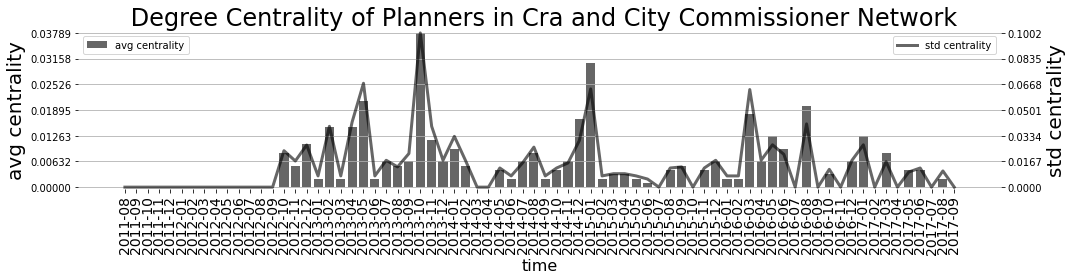

In [42]:
#plot degree centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,2] #degree centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title(" Degree Centrality of Planners in Cra and City Commissioner Network", fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,2] #degree centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("planner in cra commissioner network degree_centrality_longtime.png",dpi=300)

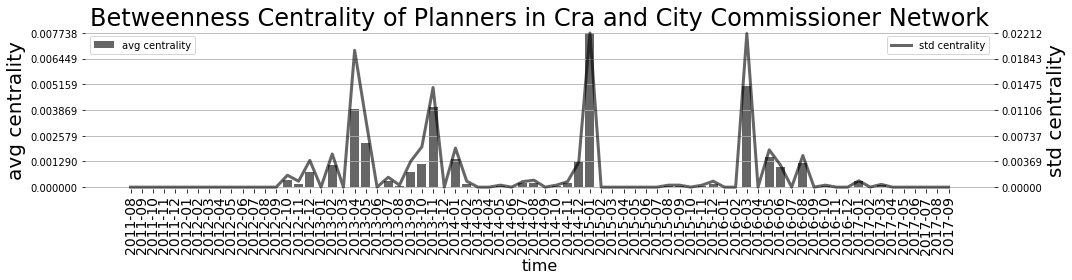

In [43]:
#plot betweenness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,3] #betweenness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title("Betweenness Centrality of Planners in Cra and City Commissioner Network", fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

#     x = centrality_stats[start_idx:,3]
#     ax2 = ax1.twinx()
#     ax2.spines['right'].set_visible(False)
#     ax2.spines['left'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax2.spines['bottom'].set_visible(False)


#     ax2.plot(x ,label = 'std centrality', c = 'black', linewidth = 3, ls = 'dashed')
#     ax2.set_ylabel('std centrality', color='black', fontsize = 20, x = 2.4, y = 0.5)
#     ax2.yaxis.set_label_coords(-0.14 ,0.5) 
#     ax2.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax2.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax2.legend(loc=2, bbox_to_anchor=(0.0,0.9))

x =whole_network_std_csv.iloc[:,3] #betweenness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)


#x = graph_stats[start_idx:,1]

#ax4 = ax1.twinx()
#ax4.spines['right'].set_visible(False)
#ax4.spines['left'].set_visible(False)
#ax4.spines['top'].set_visible(False)
#     ax4.spines['bottom'].set_visible(False)
#     ax4.spines["right"].set_position(("axes", 1.08))
#     ax4.plot(x, label = 'modified density', c = 'black', linewidth = 2, alpha = 0.6)
#     ax4.set_ylabel('modified density', color='black', fontsize = 20, x = 1.2, y = 0.5)
#     ax4.set_yticks(np.linspace(x.min(), x.max(), 7))
#     ax4.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#     ax4.legend(loc=1, bbox_to_anchor=(1.0,0.9))

plt.tight_layout()
#plt.show()
plt.savefig("planner in cra commissioner network betweeness_centrality_long time.png",dpi=300)

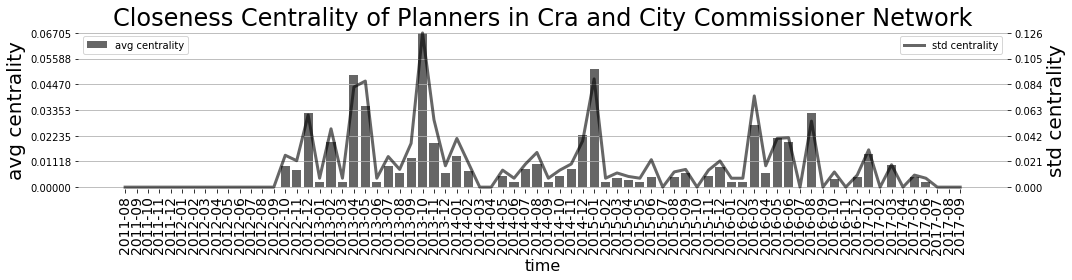

In [44]:
#plot closeness centrality
fig, ax1 = plt.subplots(figsize = (15,4))

x = whole_network_mean_csv.iloc[:,4] #closeness centrality
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_title("Closeness Centrality of Planners in Cra and City Commissioner Network", fontsize = 24)
ax1.bar(np.arange(len(whole_network_mean_csv)), x, label = 'avg centrality', alpha = 0.6, color = 'black')
ax1.legend(loc=2)
# the range is too large
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,10], y2 = centrality[:,8], color = 'red', alpha = 0.3)
# plt.fill_between(np.arange(len(idxes)) , y1 = centrality[:,9] + centrality[:,11], y2 = centrality[:,9] - centrality[:,11], color = 'red', alpha = 0.3)
ax1.set_xticks(np.arange(len(whole_network_mean_csv)))
ax1.set_xticklabels(whole_network_std_csv['time'][0:], rotation = 90, fontsize = 14)
ax1.set_xlabel('time', fontsize = 16)
ax1.set_ylabel('avg centrality', color='black', fontsize = 20)
ax1.set_yticks(np.linspace(x.min(), x.max(), 7))
ax1.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
#for ticklabel in plt.gca().get_xticklabels():
#    ticklabel.set_color(label_colors[ticklabel.get_text()])
ax1.grid(axis = 'y')

x =whole_network_std_csv.iloc[:,4] #closeness centrality std
ax3 = ax1.twinx()
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.plot(x, label = 'std centrality', c = 'black', linewidth = 3, alpha = 0.6)
ax3.set_ylabel('std centrality', color='black', fontsize = 20)
ax3.set_yticks(np.linspace(x.min(), x.max(), 7))
ax3.set_ylim(x.min() - 0.01*(x.max()-x.min()), x.max() + 0.01*(x.max()-x.min()))
ax3.legend(loc=1)

plt.tight_layout()
#plt.show()
plt.savefig("planner in cra commissioner network closeness_centrality_long_time.png",dpi=300)